In [437]:
import pandas as pd
import xgboost as xgb
import scipy.stats as stats
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import confusion_matrix
import joblib
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, precision_recall_curve, auc, make_scorer, recall_score, accuracy_score, precision_score, confusion_matrix

import matplotlib.pyplot as plt


In [8]:
import pandas as pd
import numpy as np
from sklearn.utils import shuffle
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot  as plt
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['STZhongsong']  # 指定默认字体：解决plot不能显示中文问题

In [384]:
#导入数据集
dataset_xt = pd.read_excel(r"...\Molecular_Descriptor.xlsx",sheet_name="training")
dataset_yt = pd.read_excel(r"...\ERα_activity.xlsx",sheet_name="training")
dataset_xte= pd.read_excel(r"...\Molecular_Descriptor.xlsx",sheet_name="test")
dataset_yte= pd.read_excel(r"...\ERα_activity.xlsx",sheet_name="test")

In [45]:
#查看前五条
dataset_xt.head()
dataset_yt.head()
#dataset_xte.head()
#dataset_yte.head()

,SMILES,IC50_nM,pIC50
0,Oc1ccc2O[C@H]([C@H](Sc2c1)C3CCCC3)c4ccc(OCCN5C...,2.5,8.602060
1,Oc1ccc2O[C@H]([C@H](Sc2c1)C3CCCCCC3)c4ccc(OCCN...,7.5,8.124939
2,Oc1ccc(cc1)[C@H]2Sc3cc(O)ccc3O[C@H]2c4ccc(OCCN...,3.1,8.508638
3,Oc1ccc2O[C@H]([C@@H](CC3CCCCC3)Sc2c1)c4ccc(OCC...,3.9,8.408935
4,Oc1ccc2O[C@H]([C@@H](Cc3ccccc3)Sc2c1)c4ccc(OCC...,7.4,8.130768


In [17]:
#dataset_xt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1974 entries, 0 to 1973
Columns: 730 entries, SMILES to Zagreb
dtypes: float64(359), int64(370), object(1)
memory usage: 11.0+ MB


In [53]:
# 数据集数值分析
dataset_xt.describe()
dataset_yt.describe()

,IC50_nM,pIC50
count,1.974000e+03,1974.000000
mean,9.910490e+03,6.586112
std,1.055204e+05,1.423023
min,4.600000e-02,2.455932
25%,2.702500e+01,5.382154
50%,2.625000e+02,6.580871
75%,4.148125e+03,7.568235
max,3.500000e+06,10.337242


In [385]:
#删去前面没用的列
dataset_xt.drop(dataset_xt.columns[0], inplace=True, axis=1)
dataset_yt.drop(dataset_yt.columns[0], inplace=True, axis=1)
dataset_xte.drop(dataset_xte.columns[0], inplace=True, axis=1)
dataset_yte.drop(dataset_yte.columns[0], inplace=True, axis=1)

In [386]:

#构建训练集和测试集
x_train = dataset_xt.iloc[:,0:len(dataset_xt.columns.tolist())].values
y_train = dataset_yt.iloc[:,1:len(dataset_yt.columns.tolist())].values
x_test = dataset_xte.iloc[:,0:len(dataset_xte.columns.tolist())].values
y_test = dataset_yte.iloc[:,1:len(dataset_yte.columns.tolist())].values


In [90]:
dataset_xt.describe()

,nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,nH,...,MW,WTPT-1,WTPT-2,WTPT-3,WTPT-4,WTPT-5,WPATH,WPOL,XLogP,Zagreb
count,1974.000000,1974.000000,1.974000e+03,1974.000000,1974.000000,1974.000000,1974.000000,1974.000000,1974.000000,1974.000000,...,1974.000000,1974.000000,1974.000000,1974.000000,1974.000000,1974.000000,1974.000000,1974.000000,1974.000000,1974.000000
mean,0.108409,1.110164,3.288495e+00,116.557106,60.626471,15.446809,16.189463,50.761905,28.112462,22.649443,...,391.056697,57.770682,2.053493,15.656437,8.735564,4.821318,2709.616515,46.281662,2.965087,150.716312
std,0.347900,1.434250,1.283292e+01,31.567455,19.449748,5.155854,5.635271,18.089182,8.073881,10.775491,...,111.596103,16.523972,0.031515,7.781943,4.376340,5.595087,7194.525584,13.287751,1.615263,41.445444
min,0.000000,-23.105000,3.600000e-07,54.067000,30.661930,0.000000,0.000000,21.000000,14.000000,5.000000,...,194.094294,27.170552,1.927076,2.474468,0.000000,0.000000,349.000000,14.000000,-3.592000,62.000000
25%,0.000000,0.376300,4.052598e-01,88.303700,44.432102,12.000000,12.000000,36.250000,21.000000,14.000000,...,303.981576,43.723136,2.037907,11.258623,5.187130,2.432671,918.000000,36.000000,1.934750,116.000000
50%,0.000000,1.170950,1.560251e+00,114.837500,59.901376,16.000000,18.000000,50.000000,28.000000,22.000000,...,386.036615,56.726986,2.055335,14.958520,8.213370,3.406627,2053.000000,46.000000,2.828500,148.000000
75%,0.000000,1.948100,4.018823e+00,141.423650,74.421376,18.000000,18.000000,62.000000,34.000000,29.000000,...,463.195900,69.709078,2.075121,18.440536,11.348653,6.765083,3640.000000,55.000000,3.663000,182.000000
max,4.000000,5.181700,5.338410e+02,517.429400,359.662740,30.000000,34.000000,343.000000,163.000000,180.000000,...,2349.392344,318.076845,2.141958,182.633518,50.794729,125.737688,301690.000000,230.000000,14.283000,748.000000


In [392]:
#对训练集数据标准化

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test= scaler.transform(x_test)
#删去全为0的列
idx = np.argwhere(np.all(x_train[..., :] == 0, axis=0))
x_train = np.delete(x_train, idx, axis=1)
idx = np.argwhere(np.all(x_test[..., :] == 0, axis=0))
x_test = np.delete(x_test, idx, axis=1)
print(x_train.shape)

(1974, 504)


In [402]:
xy_train = np.c_[x_train,y_train]
print(xy_train)

[[ 0.00000000e+00 -2.86000000e-01  8.17960000e-02 ...  4.66600000e+00
   1.66000000e+02  8.60205999e+00]
 [ 0.00000000e+00 -8.62000000e-01  7.43044000e-01 ...  5.80400000e+00
   1.74000000e+02  8.12493874e+00]
 [ 0.00000000e+00  7.29600000e-01  5.32316160e-01 ...  2.96400000e+00
   1.76000000e+02  8.50863831e+00]
 ...
 [ 0.00000000e+00  1.69030000e+00  2.85711409e+00 ...  1.88400000e+00
   2.28000000e+02  7.72124640e+00]
 [ 0.00000000e+00  1.33650000e+00  1.78623225e+00 ...  7.82000000e-01
   1.74000000e+02  7.88605665e+00]
 [ 0.00000000e+00  1.81930000e+00  3.30985249e+00 ...  2.52600000e+00
   2.36000000e+02  7.56863624e+00]]


In [326]:
#对x,y进行转置
xT=np.transpose(x_train)
yT=np.transpose(y_train)
print(yT)

[[8.60205999 8.12493874 8.50863831 ... 7.7212464  7.88605665 7.56863624]]


In [327]:
#各个属性的相关系数矩阵
cm=np.corrcoef(xT)
print(cm.shape)

(504, 504)


In [328]:
print(x_train.shape)

(1974, 504)


In [330]:
cor_y=[]
for i in range(len(xT)):
    cor_y.append(abs(stats.pearsonr(xT[i],yT[0])[0]))


[0.06492516067133558, 0.1880088186062783, 0.033048066269431284, 0.42514903357402956, 0.38325310794467016, 0.32546862008839517, 0.2859809670006366, 0.3619886024837772, 0.3507097632606252, 0.3449020399309951, 0.45954895553761266, 0.18622097679011168, 0.07198352325293872, 0.0065084560854231244, 0.03594102152300247, 0.08706209309296412, 0.06113107541088557, 0.0925154607444211, 0.044223204229198, 0.020659134538402863, 0.028126636816466447, 0.06085876146961609, 0.3518593515659506, 0.31852794580996546, 0.07551546990147501, 0.08786621189360212, 0.29880734506095014, 0.28646095530037047, 0.2981131703126567, 0.25060571909528717, 0.3965157318282228, 0.39912679906265935, 0.3866528782887667, 0.4007208367194104, 0.3836280059629469, 0.17881431660789554, 0.16383260143373723, 0.05601932545138112, 0.3192569566359893, 0.28178283797560166, 0.1388503015148279, 0.4285255303898785, 0.3720522357648797, 0.37405809924021793, 0.3621365801701647, 0.3178028918669411, 0.2610693867654542, 0.22317356459333196, 0.22331

In [331]:
print(max(cor_y),cor_y.index(max(cor_y)))

0.5380477982211672 439


In [332]:
nc=cor_y
idx_nums=[]
def addone(list,m):
    for i in list:
        if abs(stats.pearsonr(xT[i],xT[m])[0])>0.5:
            break
    else:
        list.append(m)
    return list
for i in range(175):
    m=max(nc)
    idx_nums=addone(idx_nums,nc.index(m))
    nc[nc.index(m)]=0
    
#while True:
#    mm=max(nc)
#    n=1
#    for i in range(n):
#        abss=abs(cm[i][nc.index(mm)])
#        if abss>0.5:
#            break
#    else:
#        n+=1
#        idx_nums.append(nc.index(mm))
#    nc[nc.index(mm)]=0
#    if n==20:
#        break
#   
print(idx_nums,len(idx_nums))

[439, 352, 283, 54, 385, 22, 141, 9, 287, 216, 253, 248, 157, 336, 347, 222, 335, 482, 69, 81] 20


In [351]:
fea_names=[]
for i in idx_nums:
    print(dataset_xt.keys()[i])
    fea_names.append(dataset_xt.keys()[i])
print(fea_names)

minssssGe
minHBint6
StN
C1SP1
minssCH2
ATSc2
nsBH2
nH
SsssN
nsSnH3
SHCsatu
SHdCH2
nssssC
SssSnH2
minwHBa
nssPbH2
SsSnH3
maxHsNH3p
VCH-4
SPC-4
['minssssGe', 'minHBint6', 'StN', 'C1SP1', 'minssCH2', 'ATSc2', 'nsBH2', 'nH', 'SsssN', 'nsSnH3', 'SHCsatu', 'SHdCH2', 'nssssC', 'SssSnH2', 'minwHBa', 'nssPbH2', 'SsSnH3', 'maxHsNH3p', 'VCH-4', 'SPC-4']


# 随机森林

In [619]:
import sklearn.datasets as datasets
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA

# 导入数据，路径中要么用\\或/或者在路径前加r
dataset_xyt = pd.read_excel(r"C:\Users\Yuang\Desktop\pxh本人\ipynb文件\Molecular_Descriptor_adjust.xlsx",sheet_name="training")

# 输出数据预览
print(dataset_xyt.head())

# 准备训练数据
X = dataset_xyt.iloc[:, 1:729].values
y = dataset_xyt.iloc[:, 730].values

# 将数据分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=0)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)
#regr = RandomForestRegressor(n_estimators=200, random_state=0)


#from six import StringIO
#from IPython.display import Image
#from sklearn.tree import export_graphviz
#import pydotplus
#import os
#
## 执行一次
## os.environ['PATH'] = os.environ['PATH']+';'+r"D:\CLibrary\Graphviz2.44.1\bin\graphviz"
#dot_data = StringIO()
#export_graphviz(pipe.named_steps['regressor'].estimators_[0],
#                out_file=dot_data)
#graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
#graph.write_png('tree.png')
#Image(graph.create_png())
#
#

                                              SMILES  nAcid   ALogP    ALogp2  \
0  Oc1ccc2O[C@H]([C@H](Sc2c1)C3CCCC3)c4ccc(OCCN5C...      0 -0.2860  0.081796   
1  Oc1ccc2O[C@H]([C@H](Sc2c1)C3CCCCCC3)c4ccc(OCCN...      0 -0.8620  0.743044   
2  Oc1ccc(cc1)[C@H]2Sc3cc(O)ccc3O[C@H]2c4ccc(OCCN...      0  0.7296  0.532316   
3  Oc1ccc2O[C@H]([C@@H](CC3CCCCC3)Sc2c1)c4ccc(OCC...      0 -0.3184  0.101379   
4  Oc1ccc2O[C@H]([C@@H](Cc3ccccc3)Sc2c1)c4ccc(OCC...      0  1.3551  1.836296   

        AMR       apol  naAromAtom  nAromBond  nAtom  nHeavyAtom  ...  \
0  126.1188  74.170169          12         12     64          31  ...   
1  131.9420  80.357341          12         12     70          33  ...   
2  139.9304  74.064997          18         18     62          33  ...   
3  133.4822  80.357341          12         12     70          33  ...   
4  143.1903  76.356583          18         18     64          33  ...   

      WTPT-1    WTPT-2     WTPT-3     WTPT-4    WTPT-5  WPATH  WPOL  XLogP

In [637]:
regr = RandomForestRegressor( bootstrap=True,
                              n_estimators=200)
#pipe = Pipeline([('scaler', StandardScaler()), ('reduce_dim', PCA()),
                # ('regressor', regr)])
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)

from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:',
      np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Mean Absolute Error: 0.524123107530093
Mean Squared Error: 0.5115468000605606
Root Mean Squared Error: 0.7152249996054113


In [638]:
# Get numerical feature importances
importances = list(regr.feature_importances_)
# List of tuples with variable and importance
print(importances)

# Saving feature names for later use
feature_list = list(dataset.columns)[0:728]

feature_importances = [(feature, round(importance, 6)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

# Import matplotlib for plotting and use magic command for Jupyter Notebooks

#import matplotlib.pyplot as plt
## Set the style
## plt.style.use('fivethirtyeight')
## list of x locations for plotting
#x_values = list(range(len(importances)))
#print(x_values)
## Make a bar chart
#plt.bar(x_values, importances, orientation = 'vertical')
## Tick labels for x axis
#plt.xticks(x_values, feature_list,rotation=6)
## Axis labels and title
#plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');
#plt.show()
#



[4.3997627247015e-05, 0.0031596719595635356, 0.0015525522088723563, 0.0007918727848641138, 0.0005233257463215304, 7.743986698661934e-05, 0.00046769348223250294, 0.00024052526804599643, 6.643271948936794e-05, 0.0004112900403401938, 0.0, 0.007485330492920238, 0.0002807572376867115, 5.758526778151071e-05, 0.00023418246085935983, 0.0, 3.2321997272237736e-05, 1.5543368833373088e-05, 1.132493057078698e-05, 1.0559430204387732e-09, 0.00028368044201636185, 0.0029865303773980857, 0.00703474768658282, 0.010222310430161934, 0.003503670001576671, 0.00344082508899989, 0.0009703372741931774, 0.0007332708915860072, 0.0005916043371127301, 0.0007609110221349748, 0.0020323771574474714, 0.0004846590974102939, 0.0005627488648699988, 0.000818936650086002, 0.0009422126626751063, 0.0012273204286170874, 0.0013601833677048274, 0.0009975767678098517, 0.0006771482606664605, 0.0279185638624617, 0.0034441420427027787, 0.003466129164536326, 0.004819611611209997, 0.00017283819667653376, 0.00029956662653396964, 0.0002

In [640]:
print(fea_names)
fea_names=["MDEC-23","LipoaffinityIndex","minsssN","maxssO","maxHsOH","minHsOH",
           "C1SP2","BCUTc-1l","MLogP","minsOH","VC-5","TopoPSA","ATSc3","minHBint5","nHBAcc","MLFER_A","hmin","MDEC-33","nC","WTPT-5"]
print(fea_names)

['MDEC-23', 'LipoaffinityIndex', 'minsssN', 'maxssO', 'maxHsOH', 'minHsOH', 'C1SP2', 'BCUTc-1l', 'MLogP', 'minsOH', 'VC-5', 'TopoPSA', 'ATSc3', 'minHBint5', 'nHBAcc', 'MLFER_A', 'hmin', 'MDEC-33', 'nC', 'WTPT-5']
['MDEC-23', 'LipoaffinityIndex', 'minsssN', 'maxssO', 'maxHsOH', 'minHsOH', 'C1SP2', 'BCUTc-1l', 'MLogP', 'minsOH', 'VC-5', 'TopoPSA', 'ATSc3', 'minHBint5', 'nHBAcc', 'MLFER_A', 'hmin', 'MDEC-33', 'nC', 'WTPT-5']


# PCA主成分分析

In [369]:
#导入数据集
dataset_xt = pd.read_excel(r"C:\Users\Yuang\Desktop\pxh本人\ipynb文件\Molecular_Descriptor.xlsx",sheet_name="training")
dataset_yt = pd.read_excel(r"C:\Users\Yuang\Desktop\pxh本人\ipynb文件\ERα_activity.xlsx",sheet_name="training")
dataset_xte= pd.read_excel(r"C:\Users\Yuang\Desktop\pxh本人\ipynb文件\Molecular_Descriptor.xlsx",sheet_name="test")
dataset_yte= pd.read_excel(r"C:\Users\Yuang\Desktop\pxh本人\ipynb文件\ERα_activity.xlsx",sheet_name="test")

#删去前面没用的列
dataset_xt.drop(dataset_xt.columns[0], inplace=True, axis=1)
dataset_yt.drop(dataset_yt.columns[0], inplace=True, axis=1)
dataset_xte.drop(dataset_xte.columns[0], inplace=True, axis=1)
dataset_yte.drop(dataset_yte.columns[0], inplace=True, axis=1)

#构建训练集和测试集
x_train = dataset_xt.iloc[:,0:len(dataset_xt.columns.tolist())].values
y_train = dataset_yt.iloc[:,1:len(dataset_yt.columns.tolist())].values
x_test = dataset_xte.iloc[:,0:len(dataset_xte.columns.tolist())].values
y_test = dataset_yte.iloc[:,1:len(dataset_yte.columns.tolist())].values

#对训练集数据标准化
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test= scaler.transform(x_test)


In [370]:
print(y_train.shape)

(1974, 1)


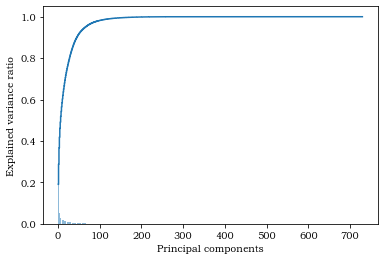

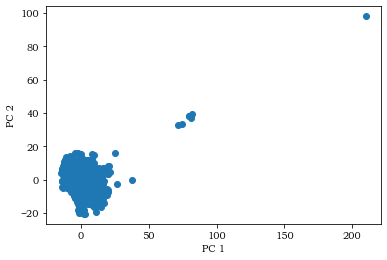

In [349]:
from sklearn.decomposition import PCA      #从sklearn直接导入PCA包来做主成分分析
pca = PCA()
x_train_pca = pca.fit_transform(x_train) #这一步直接得到了上述手动制作PCA的转化向量空间以后的142*2的新矩阵
pca.explained_variance_ratio_                 #这一步是查看原来13个输入特征投射方差对称矩阵的特征值

plt.bar(range(1, 730), pca.explained_variance_ratio_, alpha=0.5, align='center') #这是画729个特征投射后的解释力度图
plt.step(range(1, 730), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.show()

pca = PCA(n_components=5)                       #设置选前面几个主成分，这里选了由大到小的前5个
x_train_pca = pca.fit_transform(x_train)    #将训练集拿去跑程序得到参数（特征值和特征向量），然后将原来729维转化为5维
x_test_pca = pca.transform(x_test)          #测试集仍然使用训练集训练出的参数，去降维

plt.scatter(x_train_pca[:, 0], x_train_pca[:, 1])   #这是画新的特征空间里的散点图
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()

#from matplotlib.colors import ListedColormap                    #这是之前用过的画分类色图的函数
#
#def plot_decision_regions(X, y, classifier, resolution=0.02):
#
#    # setup marker generator and color map
#    markers = ('s', 'x', 'o', '^', 'v')
#    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
#    cmap = ListedColormap(colors[:len(np.unique(y))])
#
#    # plot the decision surface
#    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
#    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
#    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
#                           np.arange(x2_min, x2_max, resolution))
#    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
#    Z = Z.reshape(xx1.shape)
#    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
#    plt.xlim(xx1.min(), xx1.max())
#    plt.ylim(xx2.min(), xx2.max())
#
#    # plot examples by class
#    for idx, cl in enumerate(np.unique(y)):
#        plt.scatter(x=X[y == cl, 0], 
#                    y=X[y == cl, 1],
#                    alpha=0.6, 
#                    color=cmap(idx),
#                    edgecolor='black',
#                    marker=markers[idx], 
#                    label=cl)
#
#from sklearn.linear_model import LogisticRegression           #这是一个例子，用PCA提取特征后的数据去做逻辑回归来分类
#pca = PCA(n_components=2)                                      #选前两个主成分
#x_train_pca = pca.fit_transform(x_train)
#x_test_pca = pca.transform(x_test)
#
#lr = LogisticRegression(multi_class='ovr', random_state=1, solver='lbfgs')
#lr = lr.fit(x_train_pca, y_train)                              #用X_train_pca去跑程序
#
#plot_decision_regions(x_train_pca, y_train, classifier=lr)     #调用自制函数，去看看分类结果
#plt.xlabel('PC 1')
#plt.ylabel('PC 2')
#plt.legend(loc='lower left')
#plt.tight_layout()
## plt.savefig('images/05_04.png', dpi=300)
#plt.show()
#
#plot_decision_regions(x_test_pca, y_test, classifier=lr)
#plt.xlabel('PC 1')
#plt.ylabel('PC 2')
#plt.legend(loc='lower left')
#plt.tight_layout()
## plt.savefig('images/05_05.png', dpi=300)
#plt.show()

# 2.1 线性回归分析

D:\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


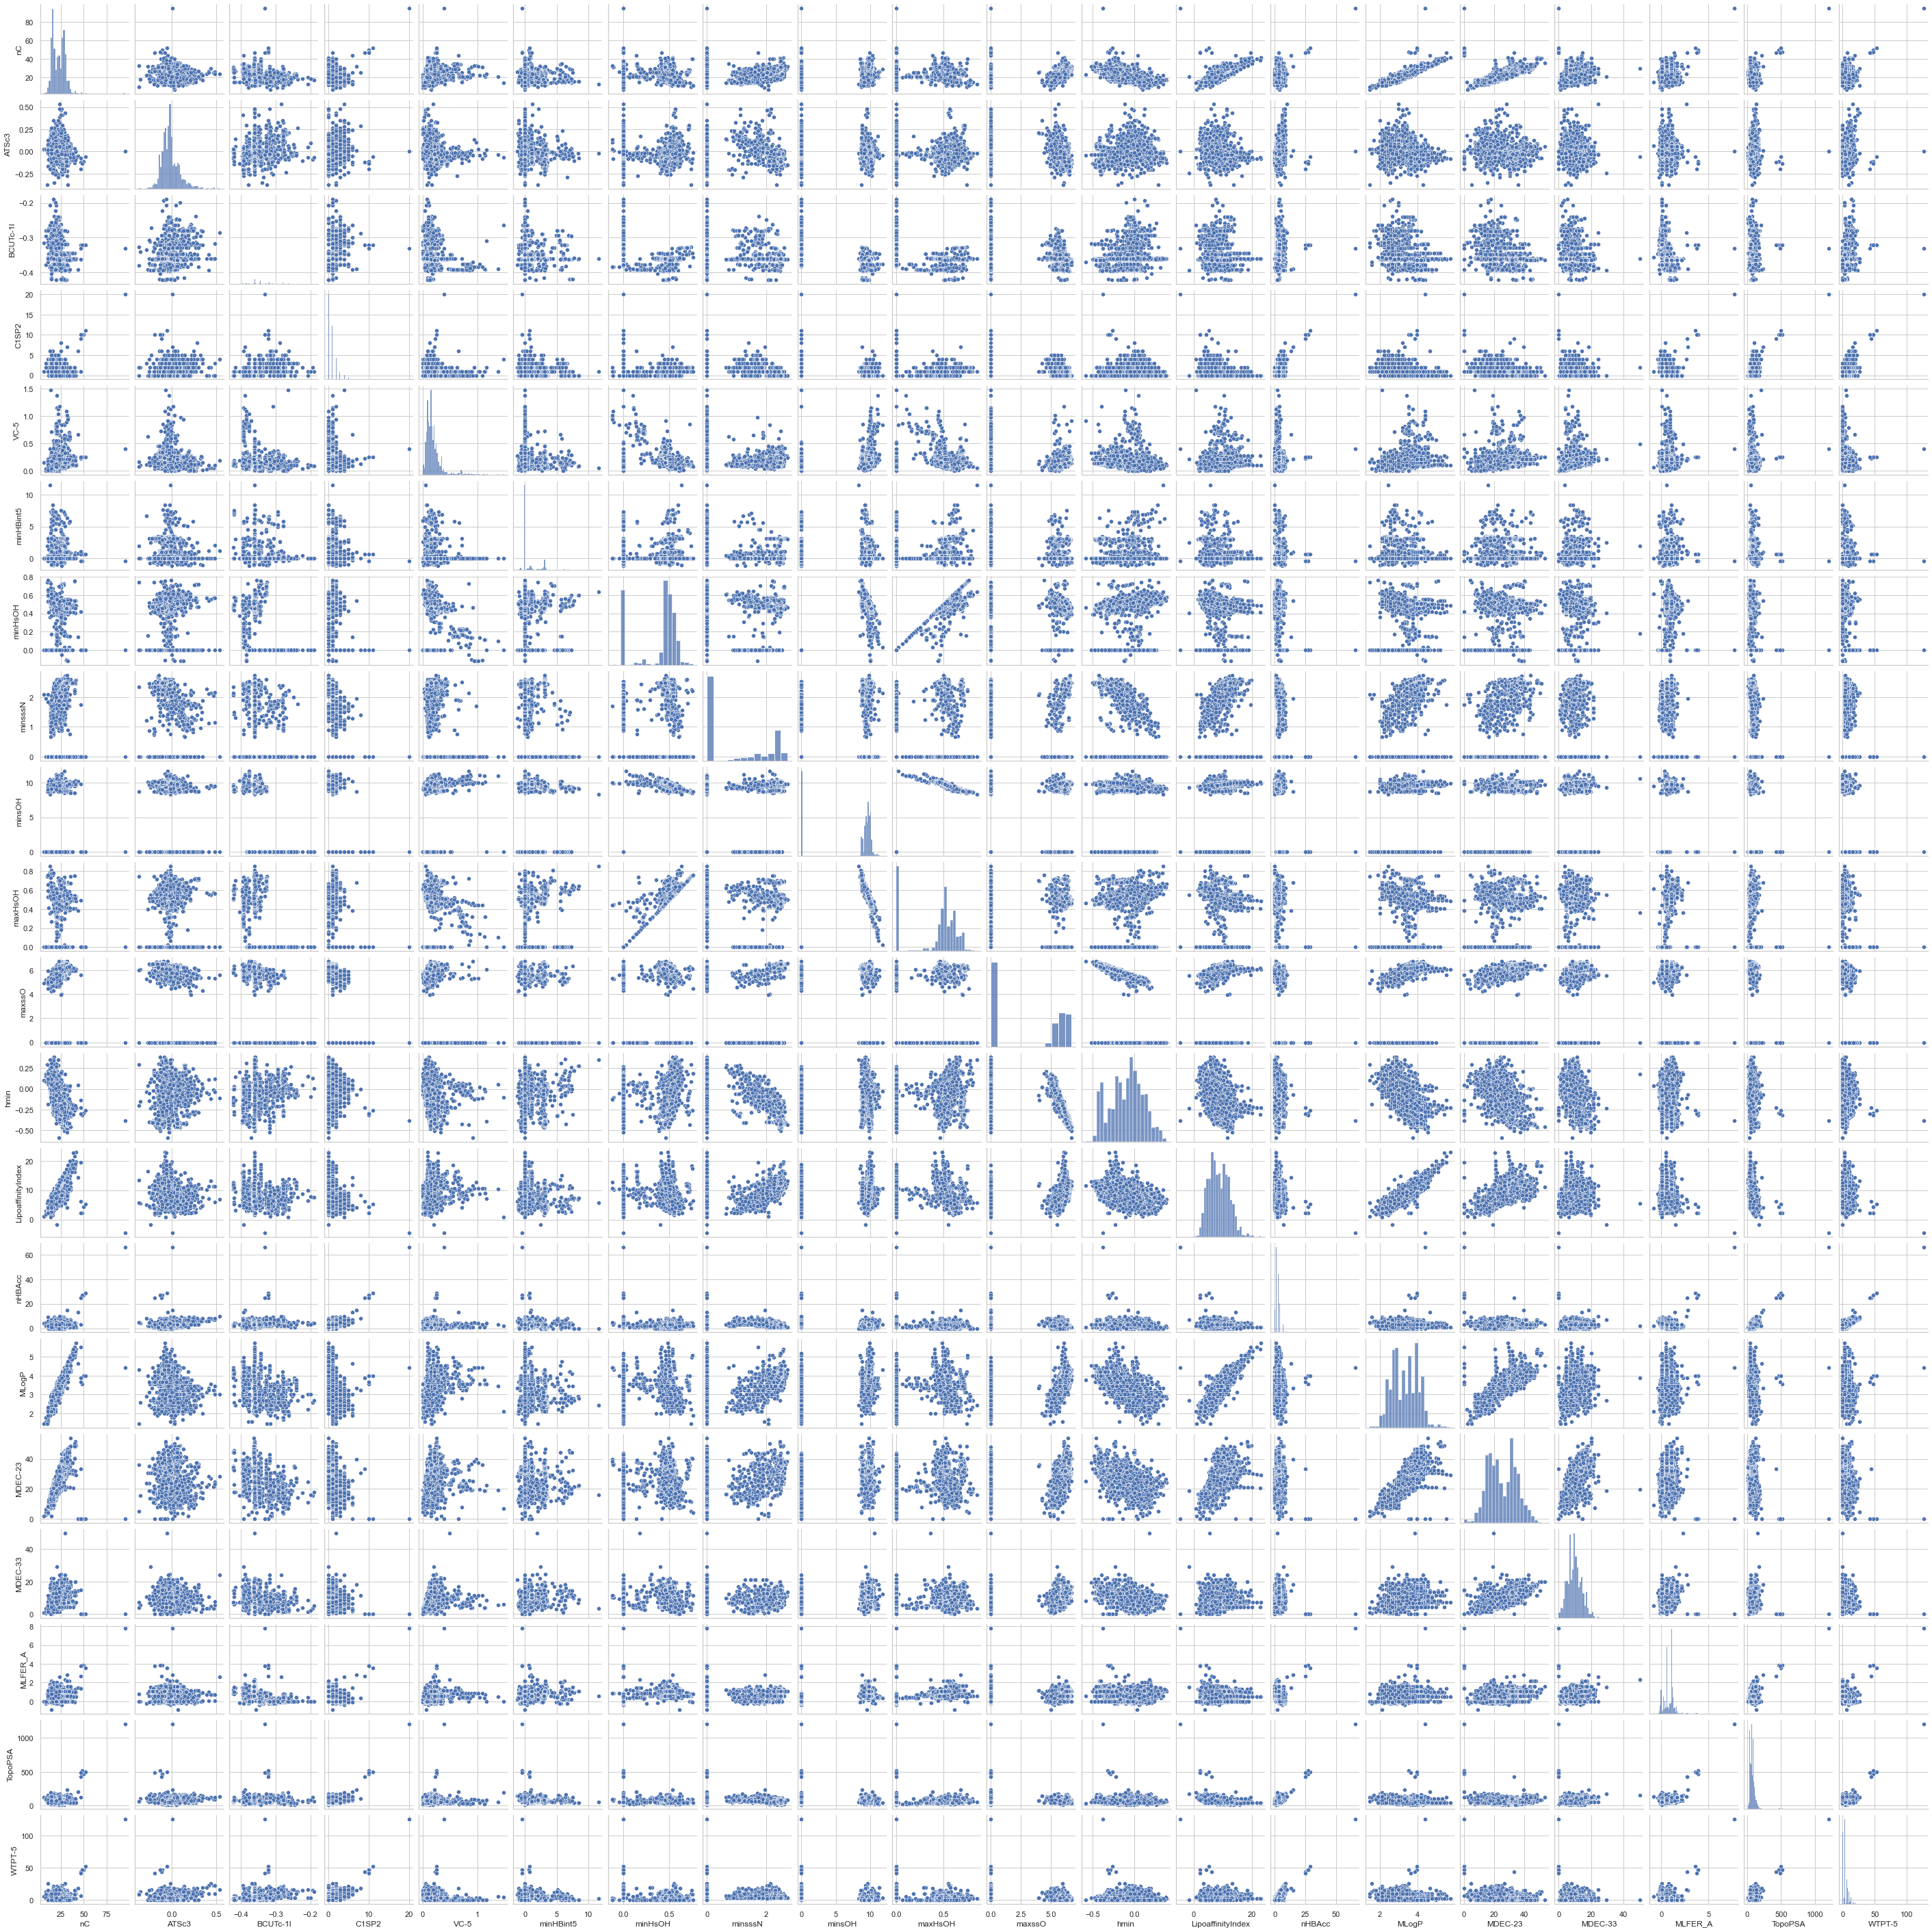

In [641]:
import numpy as np
import pandas as pd
from sklearn.linear_model import BayesianRidge, LinearRegression, ElasticNet
from sklearn.svm import SVR
from sklearn.ensemble.gradient_boosting import GradientBoostingRegressor   # 集成算法
from sklearn.model_selection import cross_val_score    # 交叉验证
from sklearn.metrics import explained_variance_score, mean_absolute_error, mean_squared_error, r2_score  
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#导入数据集
dataset_xt = pd.read_excel(r"C:\Users\Yuang\Desktop\pxh本人\ipynb文件\Molecular_Descriptor.xlsx",sheet_name="training",
                          usecols=fea_names)
dataset_yt = pd.read_excel(r"C:\Users\Yuang\Desktop\pxh本人\ipynb文件\ERα_activity.xlsx",sheet_name="training")
dataset_xte= pd.read_excel(r"C:\Users\Yuang\Desktop\pxh本人\ipynb文件\Molecular_Descriptor.xlsx",sheet_name="test",
                          usecols=fea_names)
dataset_yte= pd.read_excel(r"C:\Users\Yuang\Desktop\pxh本人\ipynb文件\ERα_activity.xlsx",sheet_name="test")

##删去前面没用的列
#dataset_xt.drop(dataset_xt.columns[0], inplace=True, axis=1)
#dataset_yt.drop(dataset_yt.columns[0], inplace=True, axis=1)
#dataset_xte.drop(dataset_xte.columns[0], inplace=True, axis=1)
#dataset_yte.drop(dataset_yte.columns[0], inplace=True, axis=1)
## 数据导入
#df = pd.read_csv('https://raw.githubusercontent.com/ffzs/dataset/master/boston/train.csv', 
                 #usecols=['lstat', 'indus', 'nox', 'rm', 'medv'])

# 可视化数据关系
sns.set(style='whitegrid', context='notebook')   #style控制默认样式,context控制着默认的画幅大小
sns.pairplot(dataset_xt, size=2)
plt.savefig('x.png')


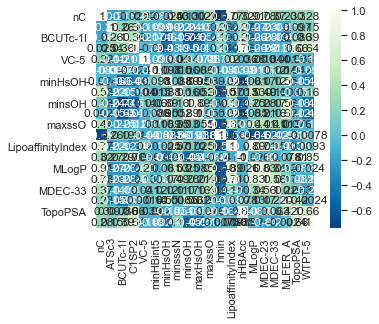

In [642]:
# 相关度
corr = dataset_xt.corr()
# 相关度热力图
sns.heatmap(corr, cmap='GnBu_r', square=True, annot=True)
plt.savefig('xx.png')


In [643]:
# 自变量
X = dataset_xt.values
# 因变量
y = dataset_yt[dataset_yt.columns[-1]].values

x_test=dataset_xte.values

In [644]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
x_test = scaler.transform(x_test)

In [645]:


##对训练集数据标准化
#scaler = StandardScaler()
#X = scaler.fit_transform(X)
#y = scaler.transform(y)
#

# 设置交叉验证次数
n_folds = 5

# 建立贝叶斯岭回归模型
br_model = BayesianRidge()

# 普通线性回归
lr_model = LinearRegression()

# 弹性网络回归模型
etc_model = ElasticNet()

# 支持向量机回归
svr_model = SVR()

# 梯度增强回归模型对象
gbr_model = GradientBoostingRegressor()

# 不同模型的名称列表
model_names = ['BayesianRidge', 'LinearRegression', 'ElasticNet', 'SVR', 'GBR']
# 不同回归模型
model_dic = [br_model, lr_model, etc_model, svr_model, gbr_model]
# 交叉验证结果
cv_score_list = []
# 各个回归模型预测的y值列表
pre_y_list = []

# 读出每个回归模型对象
for model in model_dic:
    # 将每个回归模型导入交叉检验
    scores = cross_val_score(model, X, y, cv=n_folds)
    # 将交叉检验结果存入结果列表
    cv_score_list.append(scores)
    # 将回归训练中得到的预测y存入列表
    pre_y_list.append(model.fit(X, y).predict(X))
### 模型效果指标评估 ###
# 获取样本量，特征数
n_sample, n_feature = X.shape
# 回归评估指标对象列表
model_metrics_name = [explained_variance_score, mean_absolute_error, mean_squared_error, r2_score]
# 回归评估指标列表
model_metrics_list = []
# 循环每个模型的预测结果
for pre_y in pre_y_list:
    # 临时结果列表
    tmp_list = []
    # 循环每个指标对象
    for mdl in model_metrics_name:
        # 计算每个回归指标结果
        tmp_score = mdl(y, pre_y)
        # 将结果存入临时列表
        tmp_list.append(tmp_score)
    # 将结果存入回归评估列表
    model_metrics_list.append(tmp_list)
df_score = pd.DataFrame(cv_score_list, index=model_names)
df_met = pd.DataFrame(model_metrics_list, index=model_names, columns=['ev', 'mae', 'mse', 'r2'])

# 各个交叉验证的结果
df_score


,0,1,2,3,4
BayesianRidge,0.449205,0.315518,0.485584,-0.008257,0.176311
LinearRegression,0.469720,0.309911,0.481234,-0.095689,0.161033
ElasticNet,-0.590098,0.129212,0.162149,-0.488089,0.065491
SVR,0.463653,0.346415,0.493384,0.502202,0.359249
GBR,0.587335,0.283122,0.530163,0.480798,0.316264


In [646]:
df_met

,ev,mae,mse,r2
BayesianRidge,0.546549,0.756850,0.917772,0.546549
LinearRegression,0.547064,0.755496,0.916728,0.547064
ElasticNet,0.179859,1.071192,1.659940,0.179859
SVR,0.746207,0.513184,0.513697,0.746193
GBR,0.803724,0.474091,0.397257,0.803724


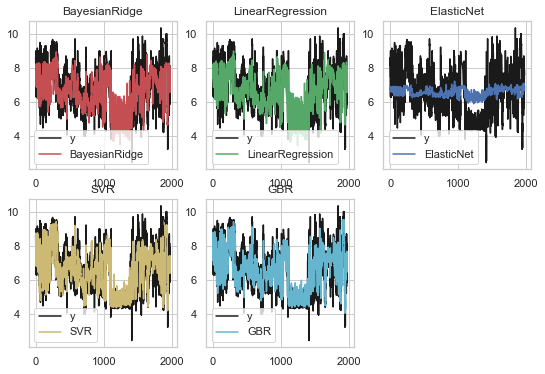

In [647]:
### 可视化 ###
# 创建画布
plt.figure(figsize=(9, 6))
# 颜色列表
color_list = ['r', 'g', 'b', 'y', 'c']
# 循环结果画图
for i, pre_y in enumerate(pre_y_list):
    # 子网络
    plt.subplot(2, 3, i+1)
    # 画出原始值的曲线
    plt.plot(np.arange(X.shape[0]), y, color='k', label='y')
    # 画出各个模型的预测线
    plt.plot(np.arange(X.shape[0]), pre_y, color_list[i], label=model_names[i])
    plt.title(model_names[i])
    plt.legend(loc='lower left')
plt.savefig('xxx.png')
plt.show()



explained_variance_score：解释回归模型的方差得分，其值取值范围是[0,1]，越接近于1说明自变量越能解释因变量的方差变化，值越小则说明效果越差。
mean_absolute_error：平均绝对误差（Mean Absolute Error, MAE），用于评估预测结果和真实数据集的接近程度的程度，其值越小说明拟合效果越好。
mean_squared_error：均方差（Mean squared error, MSE），该指标计算的是拟合数据和原始数据对应样本点的误差的平方和的均值，其值越小说明拟合效果越好。
r2_score：判定系数，其含义是也是解释回归模型的方差得分，其值取值范围是[0,1]，越接近于1说明自变量越能解释因变量的方差变化，值越小则说明效果越差。


In [648]:
yte_list=[]
yte_list.append(gbr_model.fit(X, y).predict(x_test))
print(yte_list)

[array([7.66835362, 7.48847406, 7.29226549, 7.48847406, 7.43374207,
       6.95574659, 7.31671877, 7.23134095, 7.32369112, 7.03983972,
       7.27166968, 7.08311656, 7.79997831, 7.22571549, 7.85712477,
       7.86631983, 7.47356743, 6.91468084, 6.77134502, 7.56772334,
       7.36435914, 6.77010278, 6.63419318, 6.63419318, 6.58528579,
       6.58430352, 7.2335364 , 5.87501928, 5.92937033, 5.67471886,
       5.3196145 , 5.3196145 , 5.29522071, 5.1524811 , 5.08353884,
       5.62888549, 5.62530439, 6.41383431, 6.70237455, 6.75797811,
       6.30214238, 6.3168482 , 6.85864358, 6.91795168, 6.30214238,
       7.27395264, 7.08694665, 7.07597223, 7.07597223, 7.23424912])]


In [425]:
dataset_xt = pd.read_excel(r"C:\Users\Yuang\Desktop\pxh本人\ipynb文件\Molecular_Descriptor.xlsx",sheet_name="training",
                          usecols=fea_names)
dataset_yt = pd.read_excel(r"C:\Users\Yuang\Desktop\pxh本人\ipynb文件\ERα_activity.xlsx",sheet_name="training")
dataset_xte= pd.read_excel(r"C:\Users\Yuang\Desktop\pxh本人\ipynb文件\Molecular_Descriptor.xlsx",sheet_name="test",
                          usecols=fea_names)
dataset_yte= pd.read_excel(r"C:\Users\Yuang\Desktop\pxh本人\ipynb文件\ERα_activity.xlsx",sheet_name="test")


0       8.602060
1       8.124939
2       8.508638
3       8.408935
4       8.130768
          ...   
1969    6.131944
1970    5.850781
1971    7.721246
1972    7.886057
1973    7.568636
Name: pIC50, Length: 1974, dtype: float64


# 3.1分类预测模型

In [649]:
dataset_xt = pd.read_excel(r"C:\Users\Yuang\Desktop\pxh本人\ipynb文件\Molecular_Descriptor.xlsx",sheet_name="training",
                          usecols=fea_names)
dataset_yt = pd.read_excel(r"C:\Users\Yuang\Desktop\pxh本人\ipynb文件\ADMET.xlsx",sheet_name="training")
dataset_xte= pd.read_excel(r"C:\Users\Yuang\Desktop\pxh本人\ipynb文件\Molecular_Descriptor.xlsx",sheet_name="test",
                          usecols=fea_names)
#dataset_yte= pd.read_excel(r"C:\Users\Yuang\Desktop\pxh本人\ipynb文件\ERα_activity.xlsx",sheet_name="test")

In [650]:
#构建训练集
X = dataset_xt.iloc[:,0:len(dataset.columns.tolist())].values
y = dataset_yt.iloc[:,1].values

In [651]:
# split data into train and test sets
seed = 7
test_size = 0.20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [652]:
#标准化数据（可选）
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## 3.1.1 xgboost训练（Caco-2)

In [653]:
# fit model no training data
#训练
model = XGBClassifier()
model.fit(X_train, y_train)

D:\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:47:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [654]:
# 模型测试
y_pred = model.predict(X_test)

predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))


Accuracy: 90.13%


In [655]:
dataset_xte= pd.read_excel(r"C:\Users\Yuang\Desktop\pxh本人\ipynb文件\Molecular_Descriptor.xlsx",sheet_name="test",
                          usecols=fea_names)
xte=dataset_xte.iloc[:,:].values
yte_pred = model.predict(xte); 
print(yte_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [569]:
dtest_predprob = model.predict_proba(X_test)[:,1]

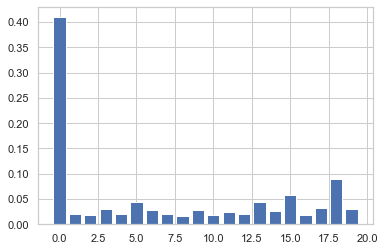

In [656]:
# 模型重要特征分析
from matplotlib import pyplot
# plot
pyplot.bar(range(len(model.feature_importances_)), model.feature_importances_)
pyplot.show()

## 3.1.2 逻辑回归算法（Caco-2)

In [657]:
#对比逻辑回归算法
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
model_lg = LogisticRegression()
model_lg.fit(X_train, y_train)

LogisticRegression()

In [659]:
# 模型测试
y_pred = model_lg.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.8329113924050633


In [660]:
yte=model_lg.predict(xte)
print(yte)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]


## 3.1.3 SVM算法(Caco-2)

D:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
No handles with labels found to put in legend.


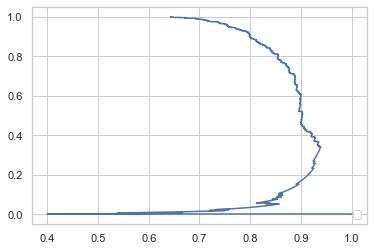

In [573]:
#对比SVM算法
import sklearn.svm
import sklearn.metrics
from matplotlib import pyplot as plt

clf_svm = sklearn.svm.LinearSVC().fit(X_train, y_train)
decision_values = clf_svm.decision_function(X_train)

precision, recall, thresholds = sklearn.metrics.precision_recall_curve(y_train, decision_values)

plt.plot(precision,recall)
plt.legend(loc="lower right")
plt.show()

In [574]:
# 模型测试
y_pred_svm = clf_svm.predict(X_test)
print(pd.crosstab(y_test, y_pred_svm, rownames=['Actual'], colnames=['Predicted']))
print(accuracy_score(y_test, y_pred_svm))
print(recall_score(y_test, y_pred_svm))

print(sklearn.metrics.roc_auc_score(y_test, y_pred_svm))
print(sklearn.metrics.f1_score(y_test, y_pred_svm))

Predicted    0    1
Actual             
0          174   25
1           29  167
0.8632911392405064
0.8520408163265306
0.8632063378115065
0.8608247422680413


In [661]:
yte=clf_svm.predict(xte)
print(yte)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1]


## 3.1.4 AdaBoost算法(Coca-2)

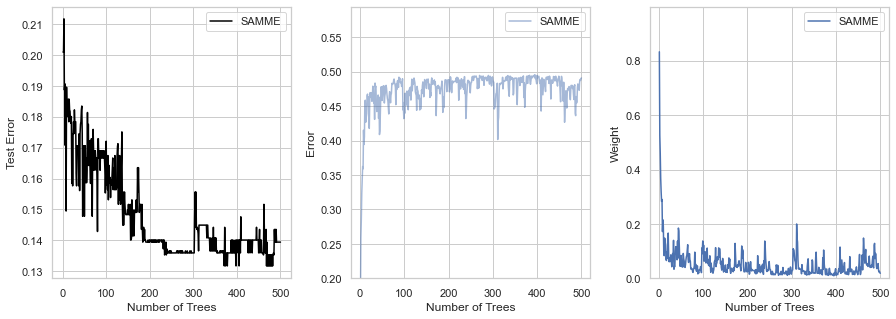

In [575]:
#对比adaboost
#from six import zip
import matplotlib.pyplot as plt

from sklearn.datasets import make_gaussian_quantiles
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

# 模型定义
bdt_discrete = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=3),
    n_estimators=500,
    learning_rate=.5,
    algorithm="SAMME")

bdt_discrete.fit(X_train, y_train)

discrete_test_errors = []


for discrete_train_predict in bdt_discrete.staged_predict(X_test):
    discrete_test_errors.append(1. - recall_score(discrete_train_predict, y_test))

n_trees_discrete = len(bdt_discrete)

# Boosting might terminate early, but the following arrays are always
# n_estimators long. We crop them to the actual number of trees here:
discrete_estimator_errors = bdt_discrete.estimator_errors_[:n_trees_discrete]
discrete_estimator_weights = bdt_discrete.estimator_weights_[:n_trees_discrete]

plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.plot(range(1, n_trees_discrete + 1),
         discrete_test_errors, c='black', label='SAMME')
plt.legend()
# plt.ylim(0.18, 0.62)
plt.ylabel('Test Error')
plt.xlabel('Number of Trees')

plt.subplot(132)
plt.plot(range(1, n_trees_discrete + 1), discrete_estimator_errors,
         "b", label='SAMME', alpha=.5)
plt.legend()
plt.ylabel('Error')
plt.xlabel('Number of Trees')
plt.ylim((.2,discrete_estimator_errors.max() * 1.2))
plt.xlim((-20, len(bdt_discrete) + 20))

plt.subplot(133)
plt.plot(range(1, n_trees_discrete + 1), discrete_estimator_weights,
         "b", label='SAMME')
plt.legend()
plt.ylabel('Weight')
plt.xlabel('Number of Trees')
plt.ylim((0, discrete_estimator_weights.max() * 1.2))
plt.xlim((-20, n_trees_discrete + 20))

# prevent overlapping y-axis labels
plt.subplots_adjust(wspace=0.25)
plt.show()

In [576]:
#模型测试
y_pred_adaboost = bdt_discrete.predict(X_test)
print(accuracy_score(y_test, y_pred_adaboost))
print(recall_score(y_test, y_pred_adaboost))
print(sklearn.metrics.roc_auc_score(y_test, bdt_discrete.predict_proba(X_test)[:,1]))

print(sklearn.metrics.f1_score(y_test, y_pred_adaboost))

0.8835443037974684
0.9132653061224489
0.9526971592657164
0.886138613861386


In [662]:
yte=bdt_discrete.predict(xte)
print(yte)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1]


## 3.1.5 随机森林(Caco-2)

In [663]:
#随机森林
from sklearn.ensemble import RandomForestClassifier

classifier_rf = RandomForestClassifier(n_estimators = 100, max_depth = 8, criterion = 'entropy',random_state = 42)
classifier_rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=8, random_state=42)

In [664]:
# 模型测试
y_pred_rf = classifier_rf.predict(X_test)
print(pd.crosstab(y_test, y_pred_rf, rownames=['Actual Class'], colnames=['Predicted Class']))

print(accuracy_score(y_test, y_pred_rf))
print(recall_score(y_test, y_pred_rf))
print(f1_score(y_test, y_pred_rf))
print(sklearn.metrics.roc_auc_score(y_test, y_pred_rf))

Predicted Class    0    1
Actual Class             
0                215   22
1                 17  141
0.9012658227848102
0.8924050632911392
0.8785046728971962
0.899789029535865


In [665]:
yte=bdt_discrete.predict(xte)
print(yte)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1]


## 3.1.6 传统机器学习算法性能对比

No handles with labels found to put in legend.


Logististics AUC: 0.919
SVM AUC: 0.863
Random Forest AUC: 0.856
XGBoost AUC: 0.954


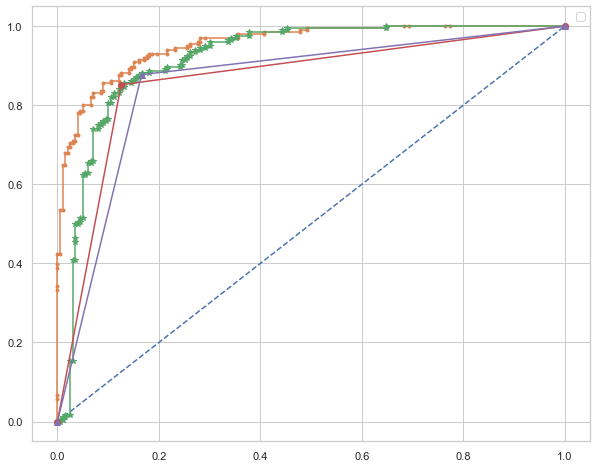

In [579]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

fig, ax = plt.subplots(figsize=(10, 8))


probs_lg = model_lg.predict_proba(X_test)[:,1]
auc_lg = roc_auc_score(y_test, probs_lg)
print('Logististics AUC: %.3f' % auc_lg)
fpr_lg, tpr_lg, thresholds_lg = roc_curve(y_test, probs_lg)


probs_svm = y_pred_svm
auc_svm = roc_auc_score(y_test, probs_svm)
print('SVM AUC: %.3f' % auc_svm)
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, probs_svm)

probs_rf = y_pred_rf
auc_rf = roc_auc_score(y_test, probs_rf)
print('Random Forest AUC: %.3f' % auc_rf)
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, probs_rf)

probs_xgb = dtest_predprob
# calculate AUC
auc_xgb = roc_auc_score(y_test, probs_xgb)
print('XGBoost AUC: %.3f' % auc_xgb)
# calculate roc curve
fpr_xgb, tpr_xgb, thresholds = roc_curve(y_test, probs_xgb)

pyplot.plot([0, 1], [0, 1], linestyle='--')

# plot the roc curve for models
pyplot.plot(fpr_xgb, tpr_xgb, marker='.')
pyplot.plot(fpr_lg, tpr_lg, marker='*')
pyplot.plot(fpr_svm, tpr_svm, marker='o')
pyplot.plot(fpr_rf, tpr_rf, marker='^')
pyplot.legend(loc="best")

pyplot.show()

## 3.1.7 基于神经网络的模型分析

In [538]:
#导入tensorflow组件
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

import pandas as pd
import numpy as np
from sklearn.utils import shuffle
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot  as plt

In [539]:
#对目标进行编码
target = y_train.reshape(-1, 1)
test_target = y_test.reshape(-1, 1)

# One-Hot编码
enc = OneHotEncoder()
enc.fit(test_target)
test_target = enc.transform(test_target).toarray()

enc.fit(target)
target = enc.transform(target).toarray()

In [540]:
# 定义输入占位符
x = tf.placeholder(tf.float32, shape=(None, 20))
# # 二分类问题 [0,1]
y = tf.placeholder(tf.float32, shape=(None, 2))
keep = tf.placeholder(tf.float32)

In [541]:
# 定义网络结构
# layer1
var1 = tf.Variable(tf.truncated_normal([20, 128], stddev=0.1))
bias1 = tf.Variable(tf.zeros([128]))
hc1 = tf.add(tf.matmul(x, var1), bias1)
h1 = tf.sigmoid(hc1)
h1 = tf.nn.dropout(h1, keep_prob=keep)

# layer2
var2 = tf.Variable(tf.truncated_normal([128, 128], stddev=0.1))
bias2 = tf.Variable(tf.zeros([128]))
hc2 = tf.add(tf.matmul(h1, var2), bias2)
h2 = tf.sigmoid(hc2)
h2 = tf.nn.dropout(h2, keep_prob=keep)

# layer3
var3 = tf.Variable(tf.truncated_normal([128, 2], stddev=0.1))
bias3 = tf.Variable(tf.zeros([2]))
hc3 = tf.add(tf.matmul(h2, var3), bias3)
h3 = tf.nn.softmax(hc3)


# 定义损失
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=h3, labels=y))
tf.summary.scalar('loss', loss)

# 定义正确率
ac = tf.cast(tf.equal(tf.argmax(h3, 1), tf.argmax(y, 1)), tf.float32)
acc = tf.reduce_mean(ac)
tf.summary.scalar('accuracy', acc)

# 定义优化器
optimzer = tf.train.AdamOptimizer(1e-3).minimize(loss)

merge_summary = tf.summary.merge_all()

In [544]:
# 训练
print("正在训练.....")
saver = tf.train.Saver(max_to_keep=1)

with tf.Session() as sess:
    init_op = tf.global_variables_initializer()
    sess.run(init_op)
    summary_writer = tf.summary.FileWriter('./logs/', sess.graph)
    nepoch=[]
    trainacc=[]
    testacc=[]
    loss1=[]
    for i in range(0, 501):

        sess.run(optimzer, feed_dict={x: X_train, y: target, keep: 0.6})
        train_summary = sess.run(merge_summary, feed_dict={x: X_train, y: target, keep: 1.0})
        summary_writer.add_summary(train_summary, i)

        if i % 50 == 0:
            accu = sess.run(acc, feed_dict={x: X_train, y: target, keep: 1.0})
            accuT = sess.run(acc, feed_dict={x: X_test, y: test_target, keep: 1.0})
            losss = sess.run(loss, feed_dict={x: X_train, y: target, keep: 1.0})

            print("epoch:" + str(i) + "   train_acc:" + str(accu) + "   test_acc:" + str(accuT) + "   loss:" + str(
                losss))

            nepoch.append(i)
            trainacc.append(accu)
            testacc.append(accuT)
            loss1.append(losss)

    #训练过程可视化
    plt.title("BP NN training")
    plt.xlabel('steps')
    plt.ylabel('score')
    plt.plot(nepoch,trainacc,nepoch,testacc)
    plt.show()
    
    #模型保存
    #saver.save(sess, './model/cancer.ckpt', global_step=i)
    sess.close()


    

正在训练.....


InvalidArgumentError: You must feed a value for placeholder tensor 'Placeholder_7' with dtype float
	 [[node Placeholder_7 (defined at <ipython-input-522-e2b626d2fcc4>:5) ]]

Original stack trace for 'Placeholder_7':
  File "D:\Anaconda3\lib\runpy.py", line 194, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "D:\Anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "D:\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "D:\Anaconda3\lib\site-packages\traitlets\config\application.py", line 845, in launch_instance
    app.start()
  File "D:\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 612, in start
    self.io_loop.start()
  File "D:\Anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 149, in start
    self.asyncio_loop.run_forever()
  File "D:\Anaconda3\lib\asyncio\base_events.py", line 570, in run_forever
    self._run_once()
  File "D:\Anaconda3\lib\asyncio\base_events.py", line 1859, in _run_once
    handle._run()
  File "D:\Anaconda3\lib\asyncio\events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "D:\Anaconda3\lib\site-packages\tornado\ioloop.py", line 690, in <lambda>
    lambda f: self._run_callback(functools.partial(callback, future))
  File "D:\Anaconda3\lib\site-packages\tornado\ioloop.py", line 743, in _run_callback
    ret = callback()
  File "D:\Anaconda3\lib\site-packages\tornado\gen.py", line 787, in inner
    self.run()
  File "D:\Anaconda3\lib\site-packages\tornado\gen.py", line 748, in run
    yielded = self.gen.send(value)
  File "D:\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 365, in process_one
    yield gen.maybe_future(dispatch(*args))
  File "D:\Anaconda3\lib\site-packages\tornado\gen.py", line 209, in wrapper
    yielded = next(result)
  File "D:\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 268, in dispatch_shell
    yield gen.maybe_future(handler(stream, idents, msg))
  File "D:\Anaconda3\lib\site-packages\tornado\gen.py", line 209, in wrapper
    yielded = next(result)
  File "D:\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 543, in execute_request
    self.do_execute(
  File "D:\Anaconda3\lib\site-packages\tornado\gen.py", line 209, in wrapper
    yielded = next(result)
  File "D:\Anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 306, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "D:\Anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 536, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "D:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2877, in run_cell
    result = self._run_cell(
  File "D:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2923, in _run_cell
    return runner(coro)
  File "D:\Anaconda3\lib\site-packages\IPython\core\async_helpers.py", line 68, in _pseudo_sync_runner
    coro.send(None)
  File "D:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3146, in run_cell_async
    has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
  File "D:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3338, in run_ast_nodes
    if (await self.run_code(code, result,  async_=asy)):
  File "D:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3418, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-522-e2b626d2fcc4>", line 5, in <module>
    keep = tf.placeholder(tf.float32)
  File "D:\Anaconda3\lib\site-packages\tensorflow\python\ops\array_ops.py", line 3285, in placeholder
    return gen_array_ops.placeholder(dtype=dtype, shape=shape, name=name)
  File "D:\Anaconda3\lib\site-packages\tensorflow\python\ops\gen_array_ops.py", line 6727, in placeholder
    _, _, _op, _outputs = _op_def_library._apply_op_helper(
  File "D:\Anaconda3\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 748, in _apply_op_helper
    op = g._create_op_internal(op_type_name, inputs, dtypes=None,
  File "D:\Anaconda3\lib\site-packages\tensorflow\python\framework\ops.py", line 3561, in _create_op_internal
    ret = Operation(
  File "D:\Anaconda3\lib\site-packages\tensorflow\python\framework\ops.py", line 2045, in __init__
    self._traceback = tf_stack.extract_stack_for_node(self._c_op)
